Train: 1.000, Test: 0.757


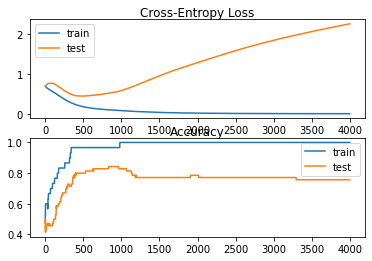

In [2]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

n_train = 30
trainX, testX = X[: n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

def plot(history):
    plt.subplot(211)
    plt.title('Cross-Entropy Loss', pad=-40)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    plt.subplot(212)
    plt.title('Accuracy', pad=-40)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot(history)

Train: 0.967, Test: 0.814


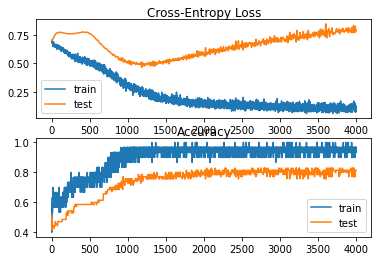

In [3]:
# mlp overfit on the two circles dataset with input noise

from keras.layers import GaussianNoise
from keras.layers import Activation

model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot(history)

Train: 1.000, Test: 0.786


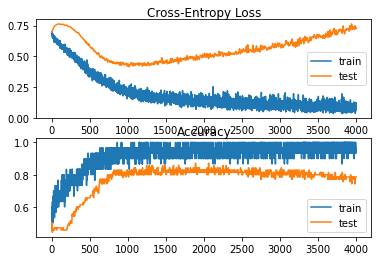

In [4]:
# mlp overfit on the two circles dataset with hidden layer noise

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()